# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
food_claims_2212 = pd.read_csv('food_claims_2212.csv')
food_claims_2212

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat


The codes in the cells below up to the start of the second task is simply exploring the data. Checking for missing values and filling them according to the instructions provided. 

In [4]:
df = food_claims_2212.copy()
df.describe()

,claim_id,time_to_close,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,1964.000000,2000.000000
mean,1000.500000,185.56800,21541.975183,8.049500
std,577.494589,49.16339,12530.156509,4.087347
min,1.000000,76.00000,1516.720000,1.000000
25%,500.750000,158.00000,10995.950000,4.000000
50%,1000.500000,179.00000,20105.700000,8.000000
75%,1500.250000,204.00000,30709.350000,12.000000
max,2000.000000,518.00000,52498.750000,15.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [6]:
df.isna().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [17]:
for column in df:
    print(column, df[column].isna().sum())

claim_id 0
time_to_close 0
claim_amount 0
amount_paid 36
location 0
individuals_on_claim 0
linked_cases 26
cause 0


In [19]:
print(df['amount_paid'].median(), df['amount_paid'].mean())

20105.699999999997 21541.97518329939


In [21]:
df['amount_paid'] = df['amount_paid'].fillna(df['amount_paid'].median())

In [23]:
df['linked_cases'] = df['linked_cases'].fillna(False)

In [24]:
df.isna().sum()

claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64

In [30]:
df['individuals_on_claim'].value_counts()

12    156
2     156
8     154
7     152
3     150
9     142
4     142
13    139
11    137
5     137
10    135
6     123
14    121
15     99
1      57
Name: individuals_on_claim, dtype: int64

Column 1, column_id, no changes were made.
Column 2, time_to_close, no missing values, no changes were deemed necessary.
Column 3, claim_amount, had no null values, had no zero values, no changes made as a result.
Column 4, amount_paid, it had 36 missing values out of 2000. The missing values were replaced with the median of this column, which is 20105.7.
Column 5, location, no null values. Showing city names for branches corresponding to the calim made.
Column 6, individuals_on_claim, the number of people in each claim, whole numbers, no null values no changes were made.
Column 7, linked_cases, showing whether any particular claim is made regarding another claim, it had 26 null values which were relaced with False, as it is the assumption. 

## Task 2
Focusing on the distribution of calims amognst the four locations.

In [34]:
df['location'].value_counts()

RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64

In [38]:
total_observations = len(df)
location_counts = df['location'].value_counts()
location_percentages = location_counts / total_observations * 100
location_percentages

RECIFE       44.25
SAO LUIS     25.85
FORTALEZA    15.55
NATAL        14.35
Name: location, dtype: float64

Category with the most observations: RECIFE


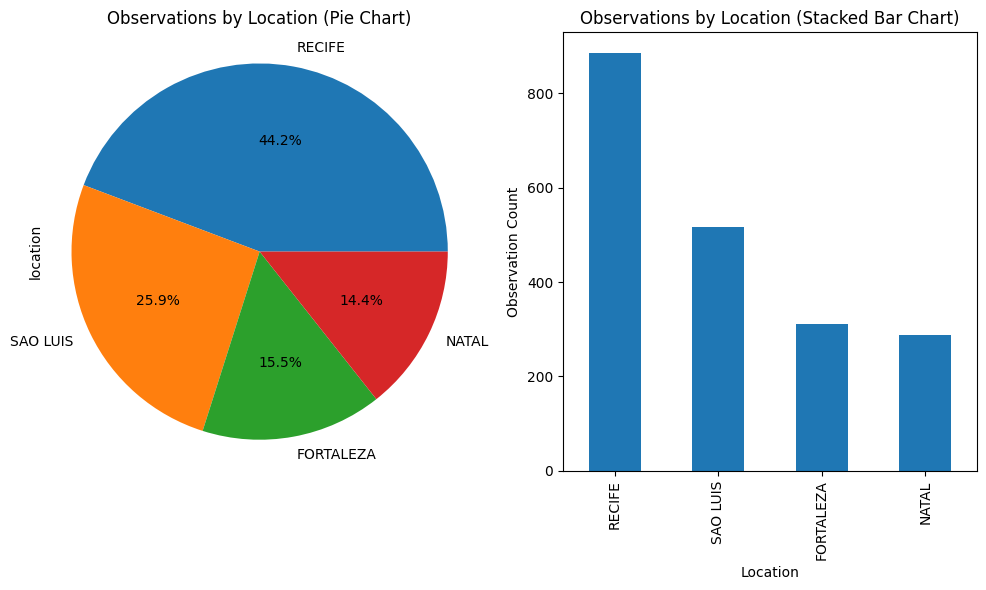

In [60]:
most_observed_location = location_counts.idxmax()
print("Category with the most observations:", most_observed_location)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
location_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Observations by Location (Pie Chart)')

plt.subplot(1, 2, 2)
location_counts.plot(kind='bar', stacked=True)
plt.xlabel('Location')
plt.ylabel('Observation Count')
plt.title('Observations by Location (Stacked Bar Chart)')

plt.tight_layout()
plt.show()


We have four locations in total. As could be gleaned from the two visualization below, RECIFE has the highest amount of claims with 885, second highest is SAO LUIS with 517 claims filed. On the third spot, FORTALEZA with 311 and lease claims were filed from NATAL, 287. The number of claims is not balanced. We can see that 70% of all claims are originated from RECIFE and SAO LUIS. In light of this it is recommended to look into reasons specailly in these two locations.

## Task 3

count    2000.00000
mean      185.56800
std        49.16339
min        76.00000
25%       158.00000
50%       179.00000
75%       204.00000
max       518.00000
Name: time_to_close, dtype: float64


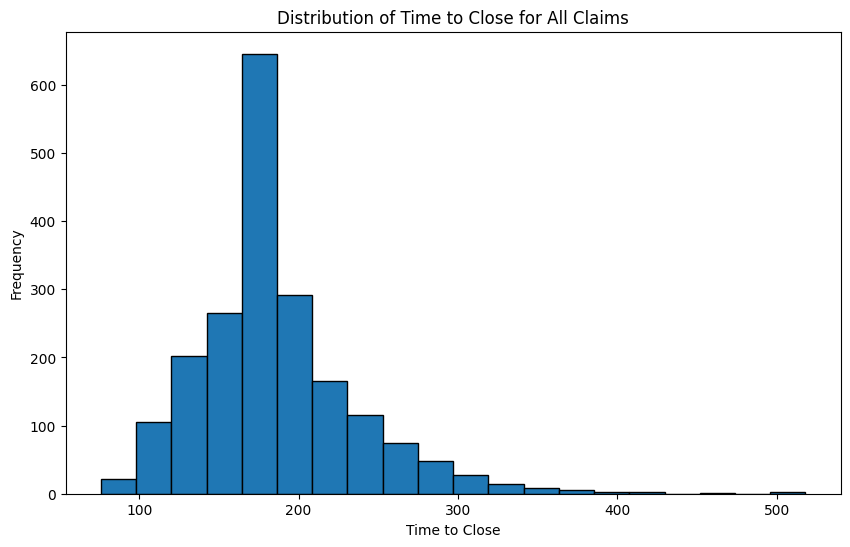

In [53]:
# Describe the distribution of time to close for all claims. Your answer must include a
# visualization that shows the distribution.
time_to_close = df['time_to_close']
description = time_to_close.describe()
print(description)

plt.figure(figsize=(10, 6))
plt.hist(time_to_close, bins=20, edgecolor='black')
plt.xlabel('Time to Close')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Close for All Claims')
plt.show()


The average amount to settle a claim is 186 days. There are some anomalies that took more than a whole year to resolve. Generally, it takes about 6 months for each claim's procession to be completes. 

## Task 4

<Figure size 1000x600 with 0 Axes>

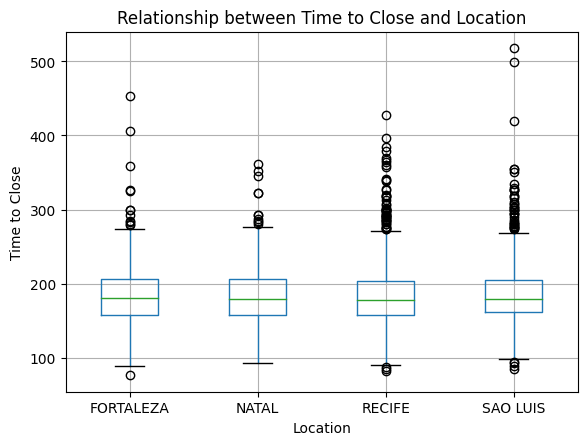

In [59]:
plt.figure(figsize=(10, 6))
df.boxplot(column='time_to_close', by='location')
plt.xlabel('Location')
plt.ylabel('Time to Close')
plt.title('Relationship between Time to Close and Location')
plt.suptitle('')
plt.show()

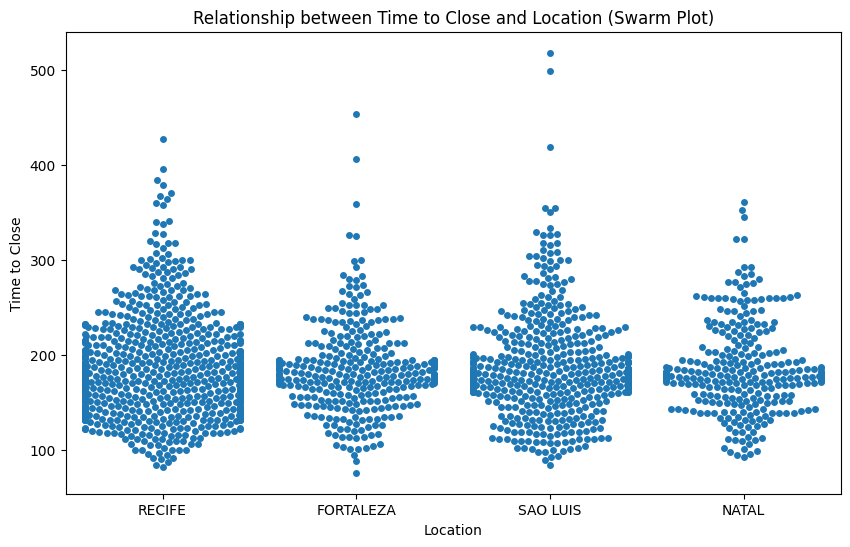

In [58]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='location', y='time_to_close', data=df)
plt.xlabel('Location')
plt.ylabel('Time to Close')
plt.title('Relationship between Time to Close and Location (Swarm Plot)')
plt.show()

Judging from the numbers we now know for each location, and looking at the graphs above, it seems that RECIFE which has the highest number of claims is also the most efficient in handling claims. The average, minimum and maximum time of resolution for cliams are very close to each other

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam